Hand Writing

In [1]:
#!pip install opencv-python

In [2]:
#import cv2

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


### Read in data

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
data= pd.read_csv('/content/drive/MyDrive/Google Colab/Hand Writing/A_Z Handwritten Data.csv')


## Split data

In [3]:
X = data.drop('0',axis = 1)
y = data['0']

## Data Reshaping
(n_images, x_shape, y_shape,channels)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_x, test_x, train_y, test_y = train_test_split(X, y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(train_x)

train_x = standard_scaler.transform(train_x)
test_x = standard_scaler.transform(test_x)


In [9]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

As our target has 26 unique values its obvious that its a one to one map so that 0 goes to A and 1 goes to B etc

### Letter Map

In [6]:
letter_map ={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [11]:
import seaborn as sns

[Text(0, 0, 'A'),
 Text(0, 0, 'B'),
 Text(0, 0, 'C'),
 Text(0, 0, 'D'),
 Text(0, 0, 'E'),
 Text(0, 0, 'F'),
 Text(0, 0, 'G'),
 Text(0, 0, 'H'),
 Text(0, 0, 'I'),
 Text(0, 0, 'J'),
 Text(0, 0, 'K'),
 Text(0, 0, 'L'),
 Text(0, 0, 'M'),
 Text(0, 0, 'N'),
 Text(0, 0, 'O'),
 Text(0, 0, 'P'),
 Text(0, 0, 'Q'),
 Text(0, 0, 'R'),
 Text(0, 0, 'S'),
 Text(0, 0, 'T'),
 Text(0, 0, 'U'),
 Text(0, 0, 'V'),
 Text(0, 0, 'W'),
 Text(0, 0, 'X'),
 Text(0, 0, 'Y'),
 Text(0, 0, 'Z')]

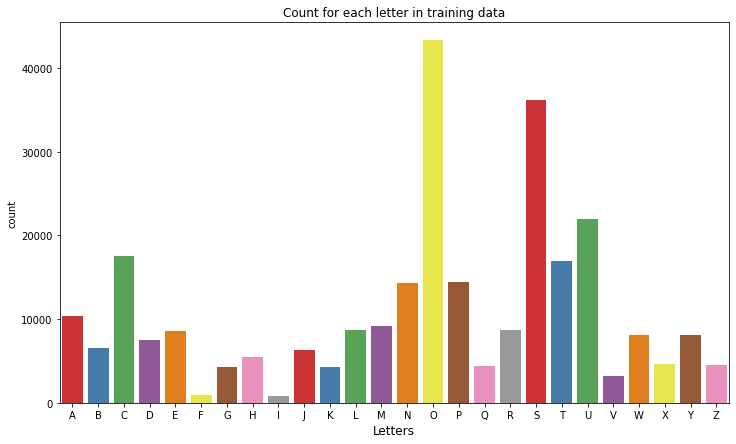

In [12]:
fig,ax=plt.subplots(figsize=(12,7))
letters= []
for i in letter_map.values():
    letters.append(i)
ax = sns.countplot(x=train_y,palette="Set1")
ax.set_xlabel("Letters",size=12)
ax.set_title("Count for each letter in training data")
ax.set_xticklabels(labels = letters)


### Shuffle Data

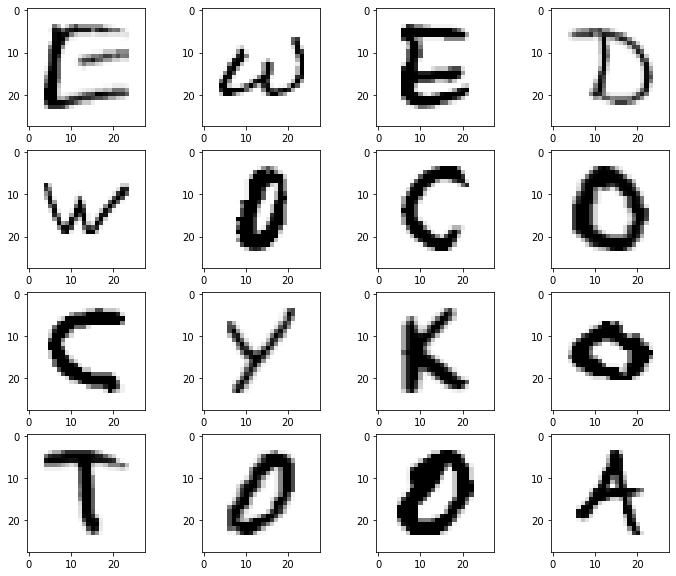

In [13]:

from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()


In [7]:
X_train = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
X_test = test_x.reshape(test_x.shape[0], 28, 28, 1).astype('float32')


y_train = np_utils.to_categorical(train_y)
y_test = np_utils.to_categorical(test_y)
print("Train data shape: ", X_train.shape)
print("Test data shape: ",X_test.shape)


Train data shape:  (279337, 28, 28, 1)
Test data shape:  (93113, 28, 28, 1)


In [15]:
import keras

In [16]:
#cls =keras.models.load_model(r"model_hand.h5")

In [8]:
model= Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])
  


Epoch 1/20
1397/1397 - 52s - loss: 0.2421 - accuracy: 0.9324 - val_loss: 0.0913 - val_accuracy: 0.9754
Epoch 2/20
1397/1397 - 6s - loss: 0.0895 - accuracy: 0.9748 - val_loss: 0.0669 - val_accuracy: 0.9820
Epoch 3/20
1397/1397 - 6s - loss: 0.0676 - accuracy: 0.9808 - val_loss: 0.0608 - val_accuracy: 0.9831
Epoch 4/20
1397/1397 - 6s - loss: 0.0557 - accuracy: 0.9837 - val_loss: 0.0496 - val_accuracy: 0.9869
Epoch 5/20
1397/1397 - 6s - loss: 0.0470 - accuracy: 0.9865 - val_loss: 0.0526 - val_accuracy: 0.9848
Epoch 6/20
1397/1397 - 6s - loss: 0.0407 - accuracy: 0.9880 - val_loss: 0.0405 - val_accuracy: 0.9894
Epoch 7/20
1397/1397 - 6s - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0381 - val_accuracy: 0.9899
Epoch 8/20
1397/1397 - 6s - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0353 - val_accuracy: 0.9907
Epoch 9/20
1397/1397 - 6s - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0356 - val_accuracy: 0.9907
Epoch 10/20
1397/1397 - 6s - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0325 -

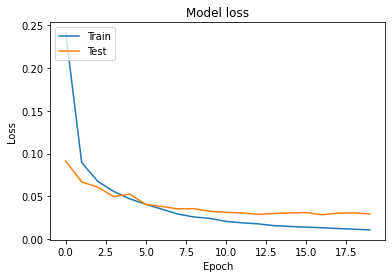

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.summary()
model.save(r'model_handwriting.h5')

# Predictions on Test Data

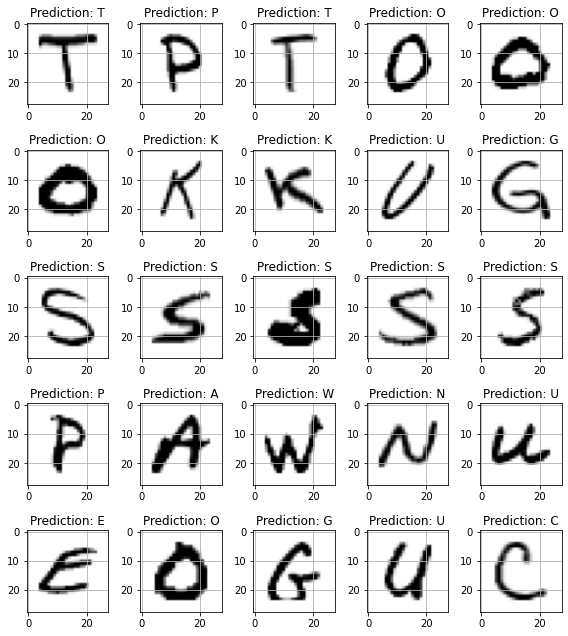

In [10]:
fig, axes = plt.subplots(5,5, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = letter_map[np.argmax(y_test[i])]
    ax.set_title("Prediction: "+pred)
    fig.tight_layout() 
    ax.grid()